In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r sample_data/

In [ ]:
output_dir = 'drive/MyDrive/BigData-finalproject/Analysis_Outputs/'

In [ ]:
import matplotlib
matplotlib.__version__


'3.2.2'

In [ ]:
!pip install matplotlib==3.4.2

     |████████████████████████████████| 10.3 MB 14.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
months_names = {1:'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', \
                6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

weekday_names = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}

In [ ]:
def grouped_bar_plot(X_labels, y_level1, label1, y_level2, label2, y_axis_label, plot_title):
    X_labels= list(X_labels)
    x = np.arange(len(X_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y_level1, width, label=label1)
    rects2 = ax.bar(x + width/2, y_level2, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_axis_label)
    ax.set_title(plot_title)
    ax.set_xticks(x); ax.set_xticklabels(X_labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    #fig.tight_layout()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

    plt.show()

In [ ]:
def two_line_plots(x1, y1,label1, x2,y2,label2,x_label, y_label, title):
    plt.plot(x1, y1, label = label1)
    plt.plot(x2, y2, label = label2)

    plt.xlabel(x_label)
    # Set the y axis label of the current axis.
    plt.ylabel(y_label)
    # Set a title of the current axes.
    plt.title(title)
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()



# REQUIREMENT 1: # REQUIREMENT 1: best month, day of month/ of week to minimize delay.

**OBSERVATIONS:**
> * The best month to travel in to minimize delay is september while the worst months (almost tie) are june and december. we think this makes sense when considering that december is the holiday season (chrismas and new year) where airports might be unusually crowded causing higher than average delays. June is the first month of summer , and school summer holidays, therefore; many people go on vacations which may cause airport crowding and explain the high delay.  September is associated with the minimum delays, we suspect becasue it's not associated with any holiday and it's the start of school season in the US so many people stay at home .

> * the worst day of week to travel on in terms of delay is friday; which makes sense because the work week in the US ends on friday; and the weekend is on saturday and sunday  for most workers, therefore, we would expect more crowding (and more delays) on friday as people travel for the weekend. the best day to travel (minimum delay) on the other hand is saturday, which, again, makes sense because it's in the middle of the weekend and not many people would be booking flights then.


> * so the best time to travel to minimize delay would be september 25th on a saturday :) 




In [ ]:
df_months = pd.read_csv(output_dir+'/req1/month_delay.csv').rename(columns={'avg(DepDelay)':'AvgDepDelay', 'avg(ArrDelay)': 'AvgArrDelay'}).sort_values(by=['Month'])
df_month_day = pd.read_csv(output_dir+'/req1/monthday_delay.csv').rename(columns={'DayofMonth':'DayOfMonth','DepDelay':'AvgDepDelay', 'ArrDelay': 'AvgArrDelay'}).sort_values(by=['DayOfMonth'])
df_week_day = pd.read_csv(output_dir+'/req1/weekday_delay.csv').rename(columns={'DepDelay':'AvgDepDelay', 'ArrDelay': 'AvgArrDelay'}).sort_values(by=['DayOfWeek'])



In [ ]:
df_months['Month'] = df_months['Month'].apply(lambda x: months_names[x])
df_months.head()

,Month,AvgDepDelay,AvgArrDelay
0,Jan,9.165621,7.242161
4,Feb,8.494506,6.408749
5,Mar,7.766177,5.336167
6,Apr,6.869592,4.579249
8,May,7.461378,5.523345


In [ ]:
df_month_day.head()

,DayOfMonth,AvgDepDelay,AvgArrDelay
6,1,8.300127,5.876454
28,2,8.156476,6.097162
10,3,7.490010,5.155834
17,4,7.369002,5.145921
12,5,7.514838,5.482881


In [ ]:
df_week_day['DayOfWeek'] = df_week_day['DayOfWeek'].apply(lambda x: weekday_names[x])
df_week_day.head()

,DayOfWeek,AvgDepDelay,AvgArrDelay
0,Mon,8.250622,6.227596
6,Tue,6.725081,4.865936
2,Wed,7.540788,6.069136
4,Thu,9.472349,8.284232
3,Fri,10.352147,8.870211


## A distribution of average delays across: months of year, day of month, and day of week

[ 0  1  2  3  4  5  6  7  8  9 10 11]


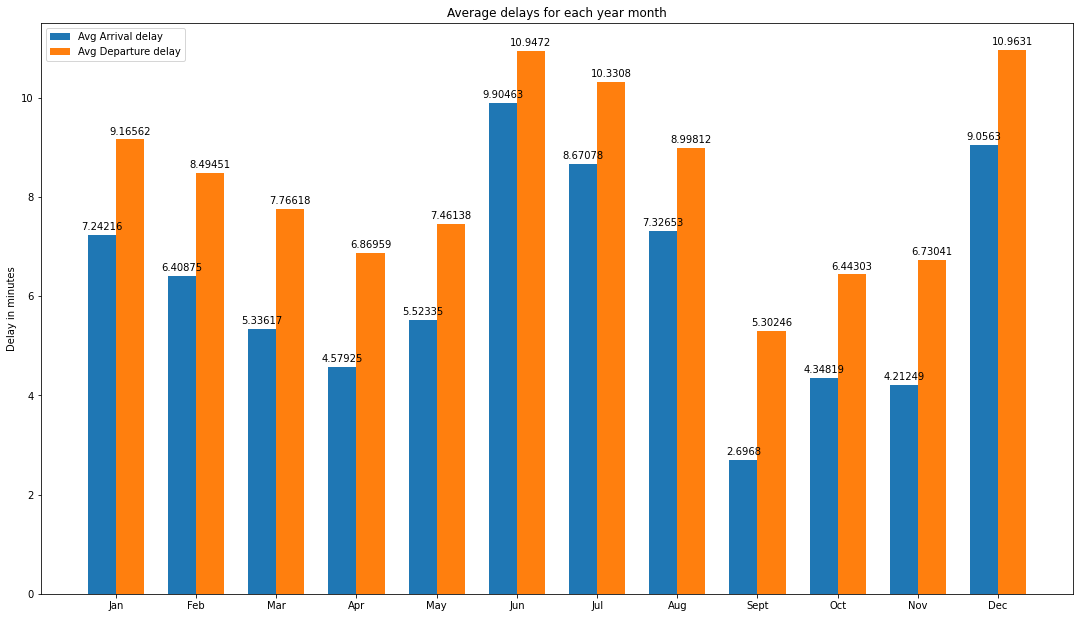

In [ ]:
grouped_bar_plot(df_months['Month'], df_months['AvgArrDelay'], 'Avg Arrival delay',\
                 df_months['AvgDepDelay'], 'Avg Departure delay', 'Delay in minutes', 'Average delays for each year month')

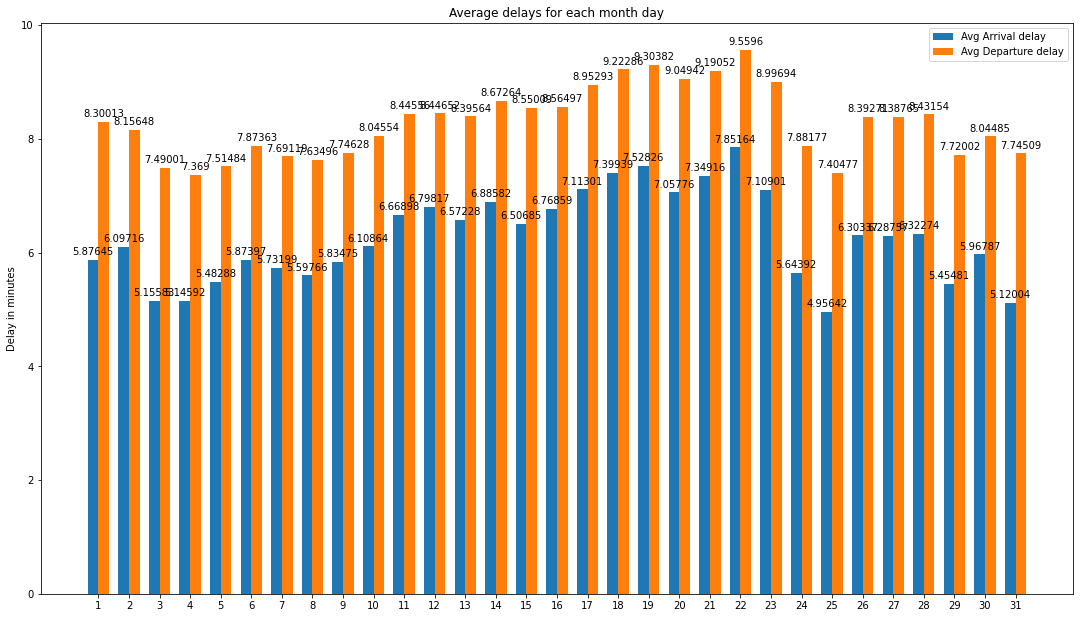

In [ ]:
grouped_bar_plot(df_month_day['DayOfMonth'], df_month_day['AvgArrDelay'], 'Avg Arrival delay',\
                 df_month_day['AvgDepDelay'], 'Avg Departure delay', 'Delay in minutes', 'Average delays for each month day')

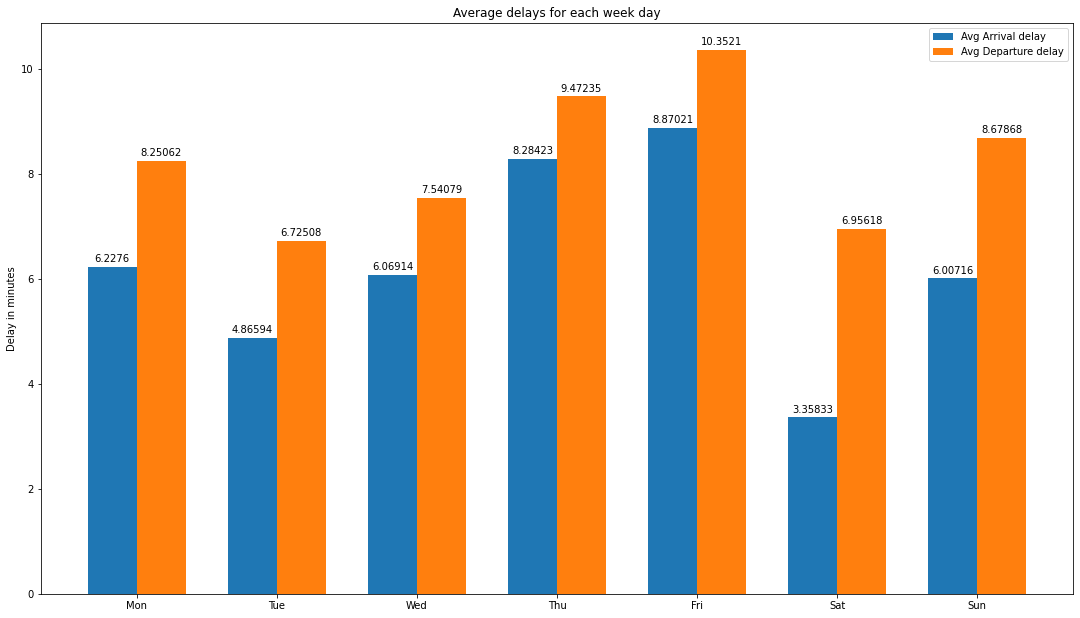

In [ ]:
grouped_bar_plot(df_week_day['DayOfWeek'], df_week_day['AvgArrDelay'], 'Avg Arrival delay',\
                 df_week_day['AvgDepDelay'], 'Avg Departure delay', 'Delay in minutes', 'Average delays for each week day')

## Month-monthday- and weekday associated with the most and least delay

In [ ]:
# I'll average the departure and arrival delays into one avg total delay metric to get the top and bottom 3
df_months['AvgTotalDelay'] = df_months[['AvgDepDelay', 'AvgArrDelay']].mean(axis=1)
df_months.sort_values(by=['AvgTotalDelay'], inplace=True)

df_month_day['AvgTotalDelay'] = df_month_day[['AvgDepDelay', 'AvgArrDelay']].mean(axis=1)
df_month_day.sort_values(by=['AvgTotalDelay'], inplace=True)

df_week_day['AvgTotalDelay'] = df_week_day[['AvgDepDelay', 'AvgArrDelay']].mean(axis=1)
df_week_day.sort_values(by=['AvgTotalDelay'], inplace=True)


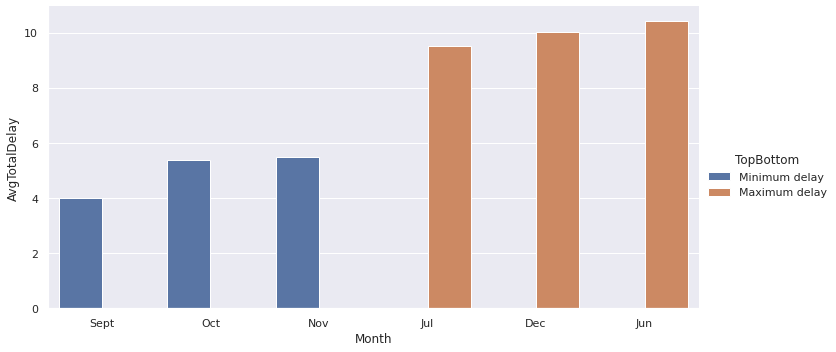

In [ ]:
m = df_months.head(3).append(df_months.tail(3))
m['TopBottom'] = ['Minimum delay', 'Minimum delay', 'Minimum delay', 'Maximum delay', 'Maximum delay', 'Maximum delay']
g = sns.catplot(x="Month", y="AvgTotalDelay", hue="TopBottom", kind="bar", data=m, height=5, aspect=2)
plt.show()

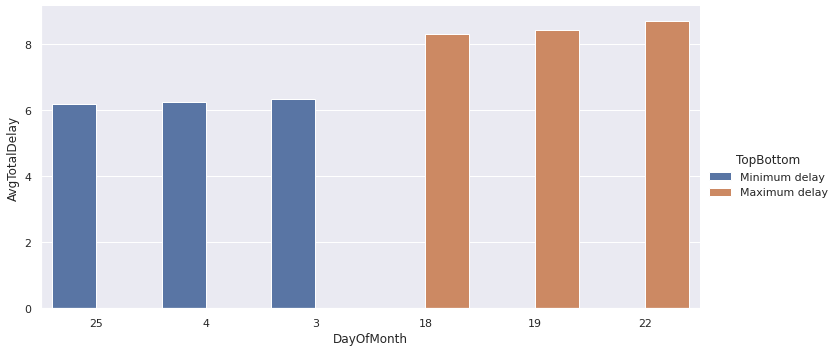

In [ ]:
m = df_month_day.head(3).append(df_month_day.tail(3)).astype({'DayOfMonth': str})
m['TopBottom'] = ['Minimum delay', 'Minimum delay', 'Minimum delay', 'Maximum delay', 'Maximum delay', 'Maximum delay']
g = sns.catplot(x="DayOfMonth", y="AvgTotalDelay", hue="TopBottom", kind="bar", data=m, height=5, aspect=2)
plt.show()

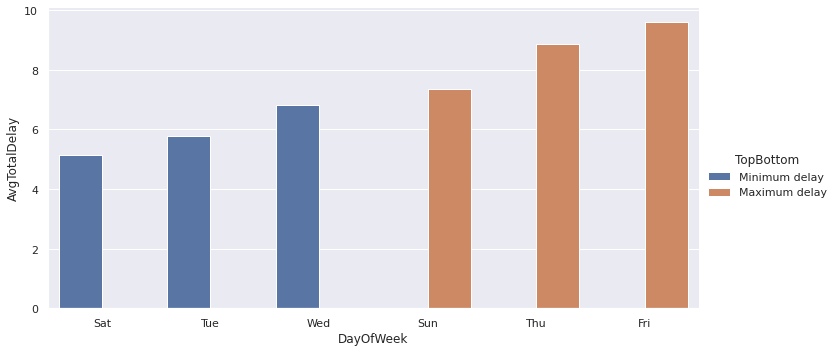

In [ ]:
m = df_week_day.head(3).append(df_week_day.tail(3))
m['TopBottom'] = ['Minimum delay', 'Minimum delay', 'Minimum delay', 'Maximum delay', 'Maximum delay', 'Maximum delay']
g = sns.catplot(x="DayOfWeek", y="AvgTotalDelay", hue="TopBottom", kind="bar", data=m, height=5, aspect=2)
plt.show()

In [ ]:
del df_months
del df_month_day
del df_week_day

# REQUIREMENT 2: 2020 travel patterns Vs Prior years

> * we notice a very interesting observation in the yearly delays data: 2020 is associated with by far the smallest delay values with the mean arrival delay actually having a negative value (early arrival). we think this makes sense given the 2020 lockdown and flight restrictions which caused a significant reduction in the number of flights being dispatched thus reducing the crowding and workload delays (logistical and organizational) that come with it. 


>* from the yearly dispatched and cancelled flights data, we notice that the minimum number of flights dispatched as well as the highest number of flights cancelled was in 2020. This is expected because of covid lockdown.

>* when analyzing the monthly trends in 2020, we found that the sharpest decrease in dispatched flights and the sharpest increase in flight cancellation happend in april of 2020. This matches the real timeline of covid lockdown since it was in the end of march and start of april that total lockdown and travel restriction policies were being implemented in the US.

In [ ]:
df_months = pd.read_csv(output_dir+'/req2/year_months.csv').drop('TotalCancelled.1', axis=1).sort_values(by=['Year','Month'])
df_just_years = pd.read_csv(output_dir+'/req2/just_years.csv').drop('TotalCancelled.1', axis=1).sort_values(by=['Year'])
df_2020 = pd.read_csv(output_dir+'/req2/just_19_20.csv').sort_values(by=['Year','Month'])

In [ ]:
df_just_years.drop(df_just_years[df_just_years['Year'] == 2007].index, inplace = True)

df_just_years

,Year,NumFlights,AvgDepDelay,AvgArrDelay,TotalCancelled
6,1996,5209305,9.943864,9.685234,128533.0
3,1997,5301975,8.198672,7.503389,97763.0
7,1998,5227026,8.949987,7.568090,144509.0
12,1999,5359994,9.283239,8.246443,154311.0
11,2000,5481278,11.198535,10.465651,187490.0
9,2001,5723646,8.010571,5.347377,231198.0
13,2002,5197835,5.468373,3.155397,65143.0
0,2003,6375599,5.218847,3.594744,101469.0
5,2004,6987150,7.842819,6.490690,127756.0
10,2005,6992750,8.615297,7.146218,133729.0


# number of flights, average delay, and number of cancelled flights across all years

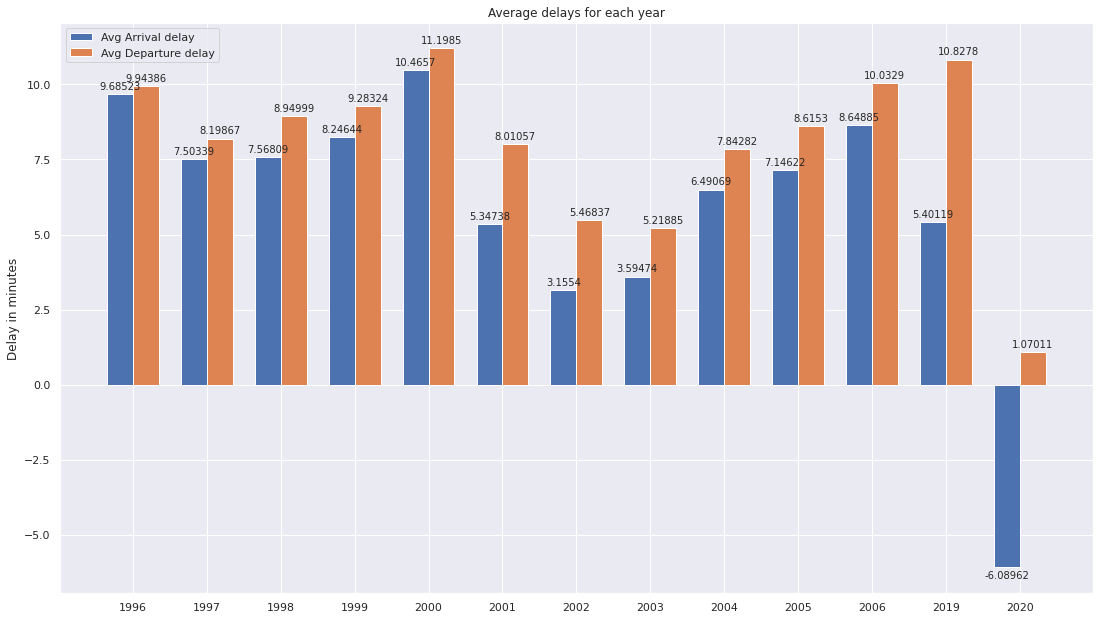

In [ ]:
# yearly flight delays
grouped_bar_plot(df_just_years['Year'], df_just_years['AvgArrDelay'], 'Avg Arrival delay',\
                 df_just_years['AvgDepDelay'], 'Avg Departure delay', 'Delay in minutes', 'Average delays for each year')

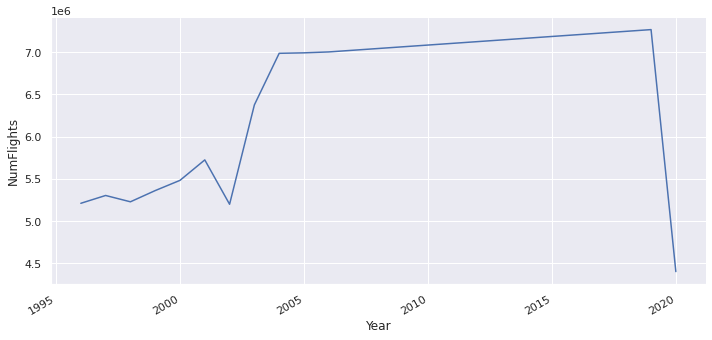

In [ ]:
# number of flights per year
g = sns.relplot(x="Year", y="NumFlights", kind="line", \
                data=df_just_years, height=5, aspect=2,palette='mako')
#g.set(xticks= df_just_years['Year']) # <--- set the ticks first
#g.set_xticklabels(df_just_years['Year'])

g.figure.autofmt_xdate()
plt.show()

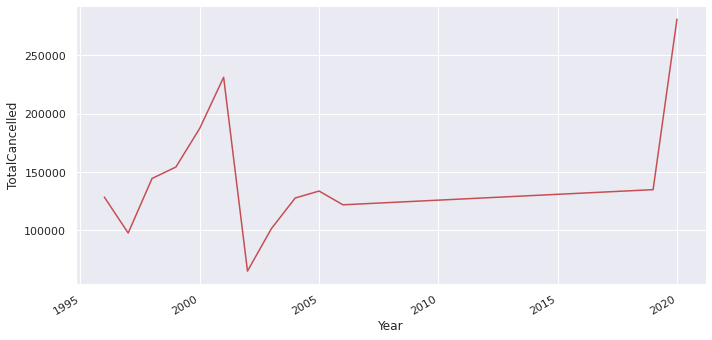

In [ ]:
# number of cancelled flights per year
g = sns.relplot(x="Year", y="TotalCancelled", kind="line", \
                data=df_just_years, height=5, aspect=2,color='r')
g.figure.autofmt_xdate()
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])

plt.show()

## focusing on the months of 2019/2020

In [ ]:
df_2020['YM']= df_2020['Year'].astype(str)+pd.Series(['-']*len(df_2020))+ df_2020['Month'].apply(lambda x: months_names[x])
df_2020.head(2)

,Year,Month,NumFlights,AvgDepDelay,AvgArrDelay,TotalCancelled,YM
1,2019,1,565963,9.679905,4.257506,16726.0,2019-Jan
6,2019,2,516314,13.259267,8.729742,15255.0,2019-Feb


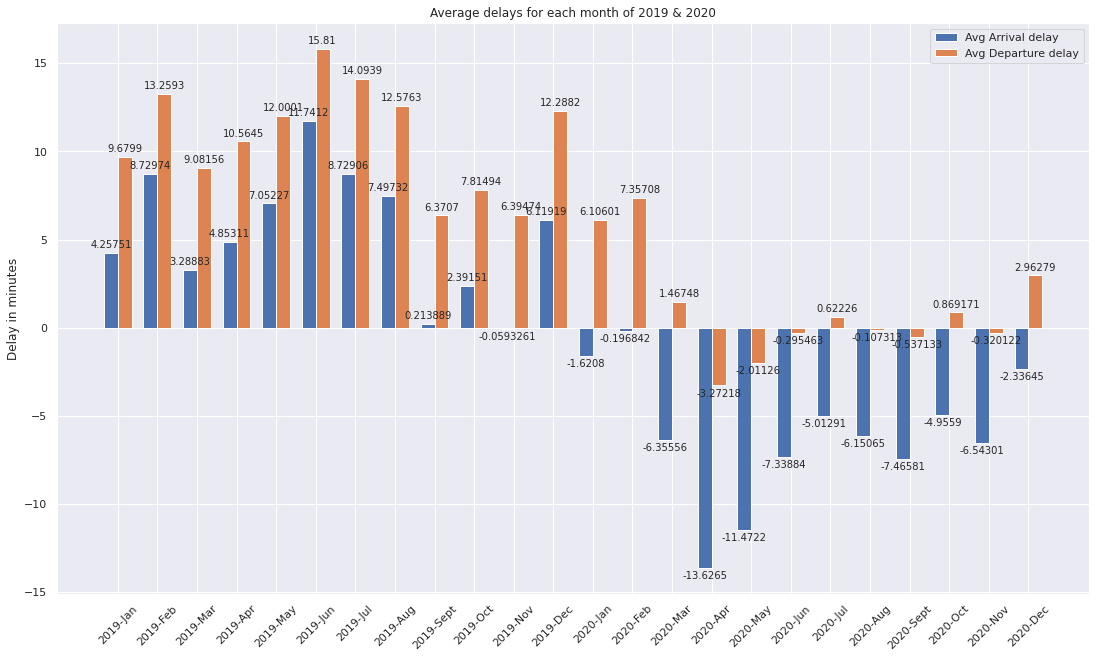

In [ ]:
# Monthly flight delays
grouped_bar_plot(df_2020['YM'], df_2020['AvgArrDelay'], 'Avg Arrival delay',\
                 df_2020['AvgDepDelay'], 'Avg Departure delay', 'Delay in minutes', 'Average delays for each month of 2019 & 2020')


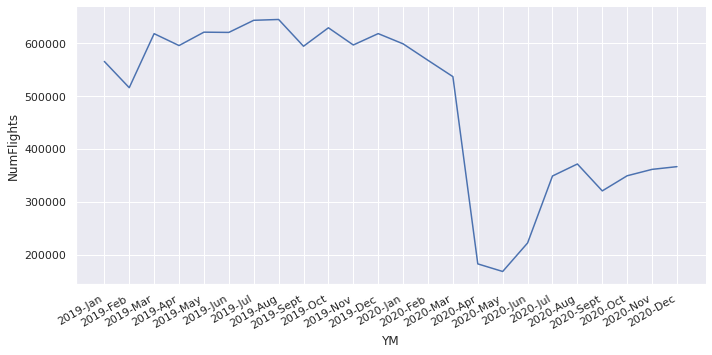

In [ ]:
# number of flights per month
g = sns.relplot(x="YM", y="NumFlights", kind="line", \
                data=df_2020, height=5, aspect=2,palette='mako')
#g.set(xticks= df_just_years['Year']) # <--- set the ticks first
#g.set_xticklabels(df_just_years['Year'])

g.figure.autofmt_xdate()
plt.show()

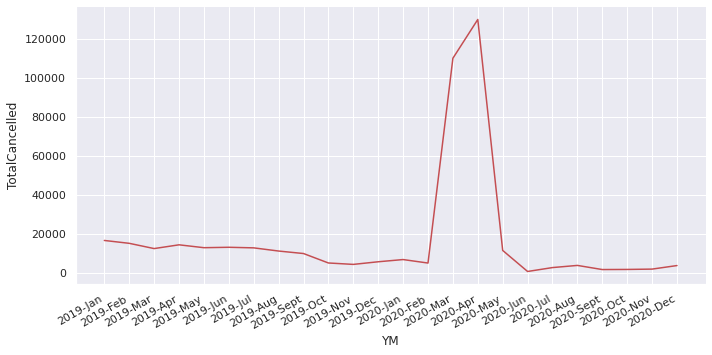

In [ ]:
# number of cancelled flights per month
g = sns.relplot(x="YM", y="TotalCancelled", kind="line", \
                data=df_2020, height=5, aspect=2,color='r')
#g.set(xticks= df_just_years['Year']) # <--- set the ticks first
#g.set_xticklabels(df_just_years['Year'])

g.figure.autofmt_xdate()
plt.show()

In [ ]:
del df_months, df_just_years, df_2020

# REQUIREMENT 3: Travel patterns pre-and post 9/11

>* by analysing the number of dispatched and cancelled flights per day during the month of september 2001, we see a very clear trend around the 11th day of september. The number of dispatched flights take a very sudden sharp fall on september 11, 12, and 13 with the minima being on sept 12 (the day after the twin tower attack). 

>* similarly the the number of cancelled flights sharply and suddenly increase around the same dates before slowly dropping back to normal in the days that follow.

In [ ]:
df_2001 =pd.read_csv(output_dir+'req3/whole_year_2001.csv')
df_sept =pd.read_csv(output_dir+'req3/sept_2001.csv').sort_values(by=['DayOfMonth'])

In [ ]:
df_sept['Month/Day'] = df_sept['MonthOf2001'].astype(str)+pd.Series(['/']*len(df_sept))+ df_sept['DayOfMonth'].astype(str)
df_sept.head(2)

,MonthOf2001,DayOfMonth,NumFlights,AvgDepDelay,AvgArrDelay,TotalCancelled,Month/Day
4,9,1,14454,4.714543,-1.671786,196.0,9/1
11,9,2,14195,0.781261,-6.745756,155.0,9/2


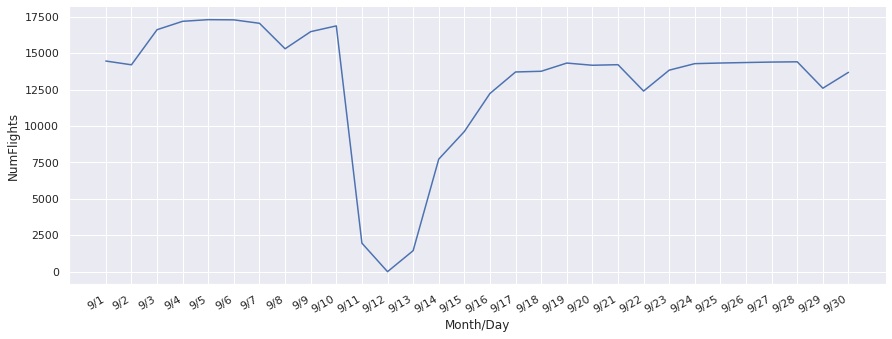

In [ ]:
# number of flights per day in september 2001
g = sns.relplot(x='Month/Day', y="NumFlights", kind="line", \
                data=df_sept, height=5, aspect=2.5,palette='mako')
#g.set(xticks= df_just_years['Year']) # <--- set the ticks first
#g.set_xticklabels(df_just_years['Year'])

g.figure.autofmt_xdate()
plt.show()

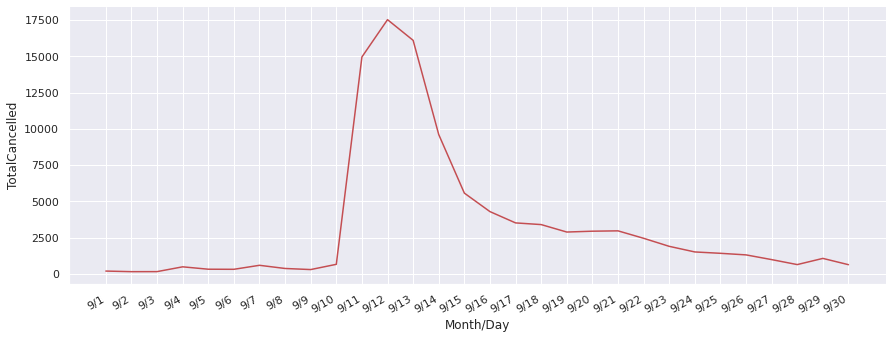

In [ ]:
# number of cancelled flights per day in september 2001
g = sns.relplot(x='Month/Day', y="TotalCancelled", kind="line", \
                data=df_sept, height=5, aspect=2.5,color='r')
#g.set(xticks= df_just_years['Year']) # <--- set the ticks first
#g.set_xticklabels(df_just_years['Year'])

g.figure.autofmt_xdate()
plt.show()

# REQUIREMENT 4: delay patterns per airport - the airports associated with the highest departure delays

In [ ]:
airport_del = pd.read_csv(output_dir+'req4/airport_delays.csv').drop('Unnamed: 0',axis=1).sort_values(by=['AvgDepDelay'])

In [ ]:
airport_del['Origin']=airport_del['Origin'].apply(lambda x: x.replace("'",'').replace('[','').replace(']',''))

In [ ]:
airport_del.head(3)

,OriginAirportID,Origin,OriginCityName,OriginStateName,AvgDepDelay
324,13304,MIB,"['Minot, ND']",['North Dakota'],-7.136364
117,13034,LNY,"['Lanai, HI']",['Hawaii'],-4.636704
379,14955,SPN,"['Saipan, TT']",['U.S. Pacific Trust Territories and Possessio...,-4.402367


In [ ]:
airport_del.tail(3)

,OriginAirportID,Origin,OriginCityName,OriginStateName,AvgDepDelay
9,10272,ALS,"['Alamosa, CO']",['Colorado'],31.520000
36,10917,CDB,"['Cold Bay, AK']",['Alaska'],31.873950
73,11711,FMN,"['Farmington, NM']",['New Mexico'],203.666667


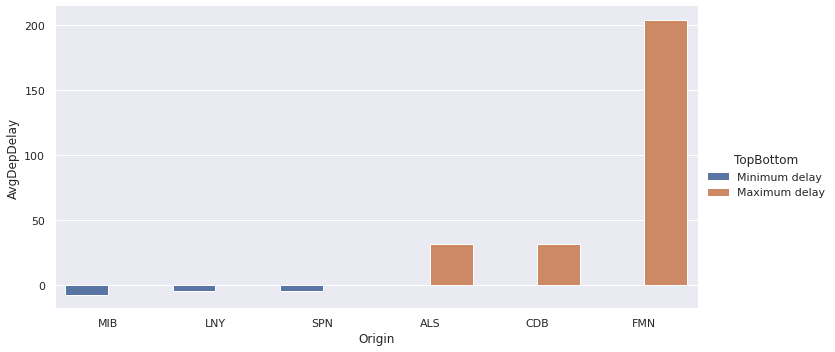

In [ ]:
m = airport_del.head(3).append(airport_del.tail(3))
m['TopBottom'] = ['Minimum delay', 'Minimum delay', 'Minimum delay', 'Maximum delay', 'Maximum delay', 'Maximum delay']
g = sns.catplot(x="Origin", y="AvgDepDelay", hue="TopBottom", kind="bar", data=m, height=5, aspect=2)
plt.show()

# REQUIREMENT 5: How does the number of flights between different locations change over time?

1.   List item
2.   List item



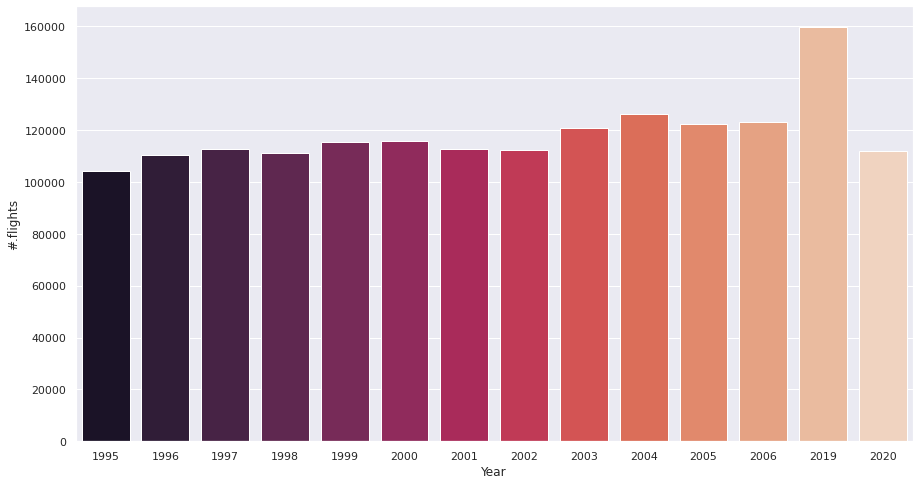

In [110]:
n_flights = pd.read_csv(output_dir+'req5/year_state.csv')
to_plot = n_flights.loc[n_flights['OriginState'] == 'WA']
to_plot.head()
to_plot =to_plot.drop(to_plot[to_plot['Year'] == 2007].index)

g = sns.barplot(x=to_plot["Year"], y=to_plot["count"],palette="rocket")


g.set_ylabel("#.flights")
plt.show()

In [111]:
n_flights = pd.read_csv(output_dir+'req5/year_2states.csv')
to_plot = n_flights.loc[n_flights['orig-dst'] == 'NJ-NY']
to_plot =to_plot.drop(to_plot[to_plot['Year'] == 2007].index)

to_plot.head()

,Unnamed: 0,orig-dst,Year,count
10460,10460,NJ-NY,1995,2609
10461,10461,NJ-NY,1996,2433
10462,10462,NJ-NY,1997,1883
10463,10463,NJ-NY,1998,1399
10464,10464,NJ-NY,1999,1801


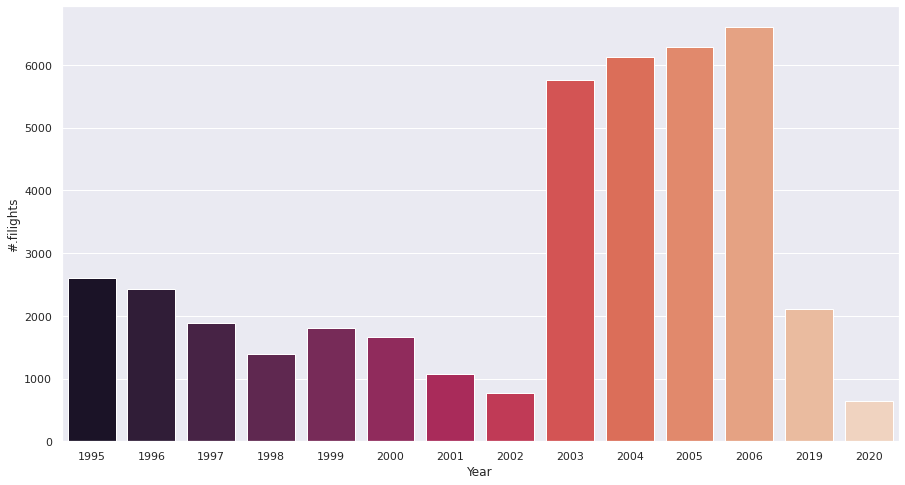

In [112]:
g = sns.barplot(x=to_plot["Year"], y=to_plot["count"], palette="rocket")


g.set_ylabel("#.filights")
plt.show()

# REQUIREMENT 6: Distance travelled per year

In [ ]:
loc = 'req6/distance_year.csv'
df = pd.read_csv(output_dir+loc).drop('Unnamed: 0',axis=1).dropna()
df = df.drop(df[df['Year'] == 2007].index)


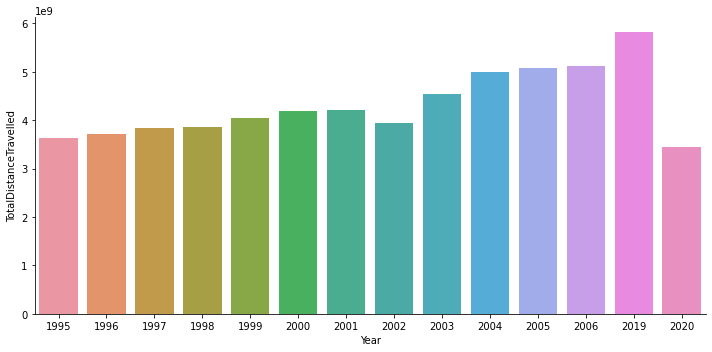

In [ ]:
g = sns.catplot(x="Year", y="TotalDistanceTravelled",  kind="bar", data=df, height=5, aspect=2)


# REQUIREMENT 7: Seasons.



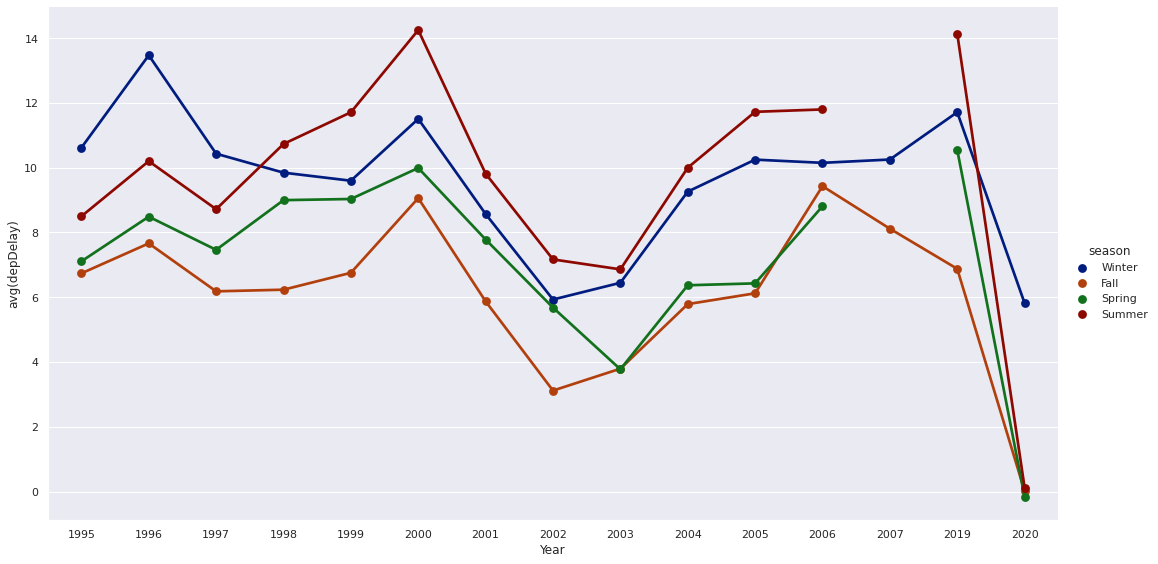

In [93]:
from matplotlib import pyplot

n_flights = pd.read_csv(output_dir+'req7/season_year.csv')
to_plot = n_flights.loc[n_flights['season'] == 'Winter']
to_plot
#g = sns.barplot(x=to_plot["Year"], y=to_plot["avg(depDelay)"],palette="rocket")
#fig, ax = pyplot.subplots(figsize=(20,15))
#plt.figure(figsize=(15,8))
sns.set(rc={'figure.figsize':(20,15)})
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

g = sns.catplot(
    data=n_flights, kind="point",
    x="Year", y="avg(depDelay)", hue = 'season',
    ci="sd", palette="dark",height=8, aspect=15/8)



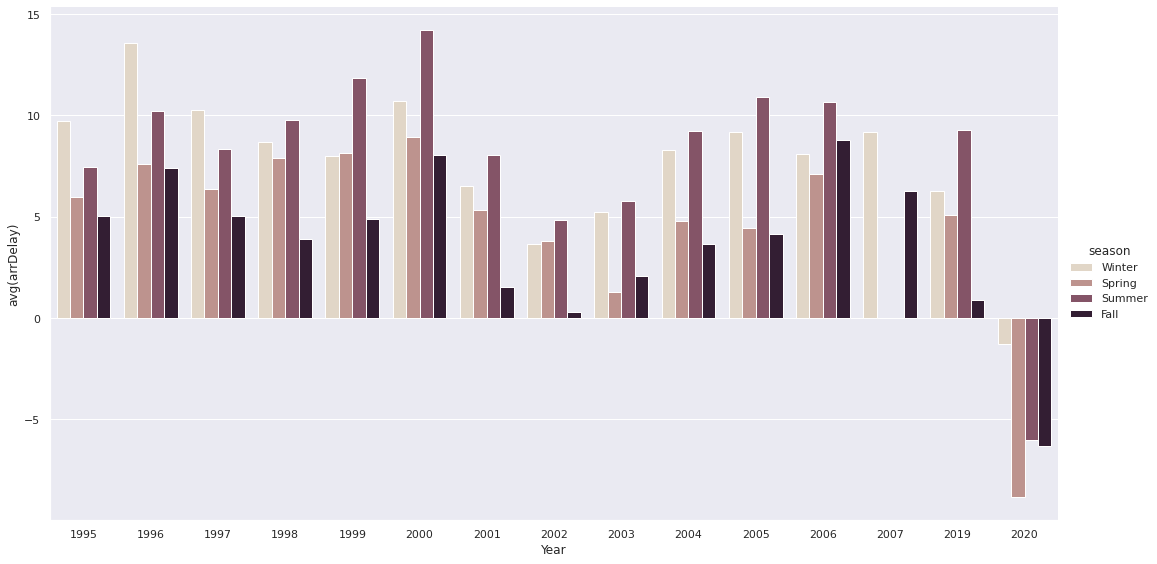

In [102]:
g = sns.catplot(
    data=n_flights, kind="bar",
    x="Year", y="avg(arrDelay)", hue = 'season', hue_order = ['Winter', 'Spring', 'Summer', 'Fall'],
    ci="sd",palette = 'ch:.25', height=8, aspect=15/8)


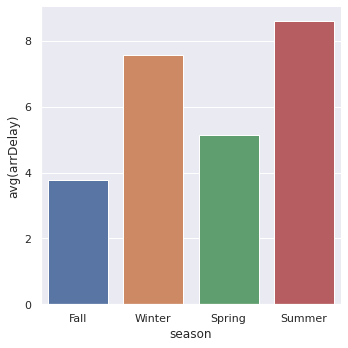

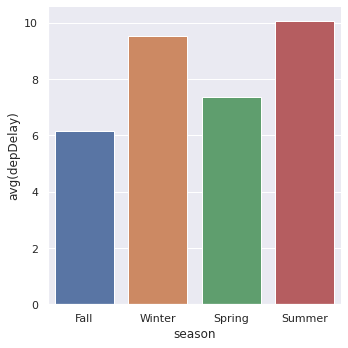

In [109]:

n_flights = pd.read_csv(output_dir+'req7/seasonDelay.csv')
#to_plot = n_flights.loc[n_flights['season'] == 'Winter']
sns.catplot( x="season", y="avg(arrDelay)",  kind="bar", data=n_flights)
sns.catplot( x="season", y="avg(depDelay)",  kind="bar", data=n_flights)


#REQUIREMENT 8: Most popular destination across the years 
the most popular destination has been overwhelmingly chicago illinois since 1995. 

In [ ]:
dest_df = pd.read_csv(output_dir+'req8/most_popular_dest.csv').drop('Unnamed: 0',axis=1).sort_values(by=['Year'])
dest_df.head()


,Year,DestCityName,DestStateName,NumFlights
12,2007,"Atlanta, GA",Georgia,57751
14,2020,"Atlanta, GA",Georgia,242858
5,2000,"Chicago, IL",Illinois,327665
1,1996,"Chicago, IL",Illinois,328765
3,1998,"Chicago, IL",Illinois,328882


In [ ]:
total_dest = dest_df[['DestCityName', 'NumFlights']].groupby('DestCityName').sum().sort_values(by='NumFlights', ascending=False)
total_dest['DestCityName'] = total_dest.index

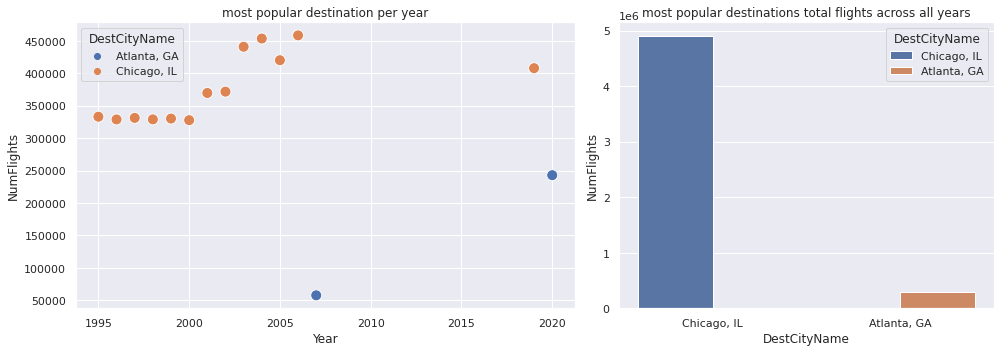

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=dest_df, x="Year", y="NumFlights", hue="DestCityName", ax=axs[0], s=120)
axs[0].set_title('most popular destination per year')
sns.barplot(data=total_dest, x='DestCityName', y='NumFlights',hue='DestCityName', ax=axs[1])
axs[1].set_title('most popular destinations total flights across all years')

f.tight_layout()


# REQUIREMENT 9: The busiest airports across the years

> * we note that the busiest airports across the years are O'Hare International Airport (ORD) in Chicago Illinois, and Hartsfield-Jackson International Airport (ATL) in Atlanta Georgia. This is consistent  with real documented trends such as the refernce image below: we note that both ORD and ATL are in the top 3 busiest US airports in 2016 as per this wikipidea page. It is to be noted however that this reference measure total passenger traffic while we measure numberof incoming and outgoing flights so the results will not perfectly align but it's  an interesting analogy nontheless 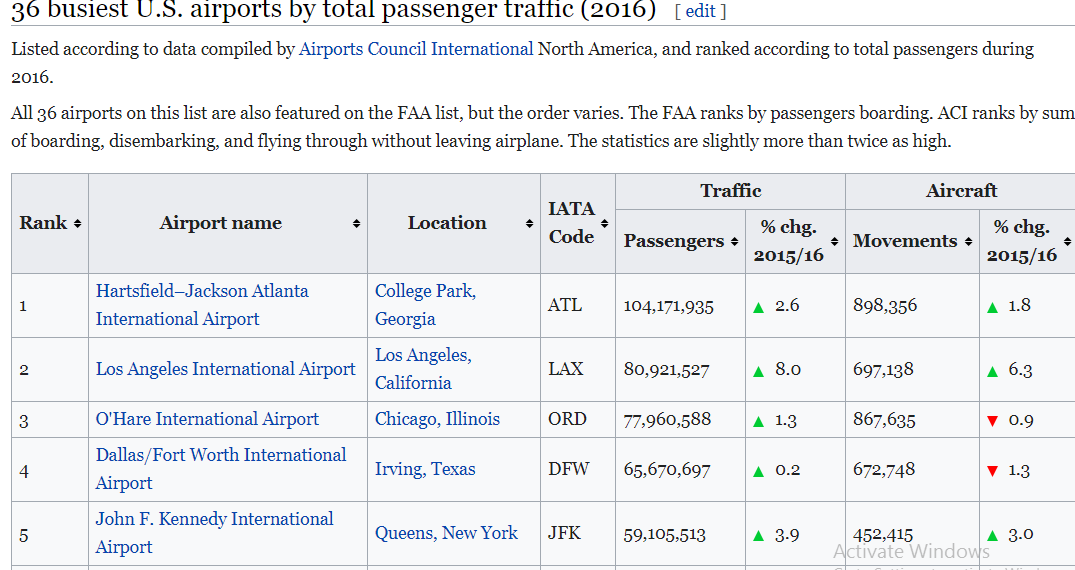

In [ ]:
airports = pd.read_csv(output_dir+'req9/busiest_airport.csv').drop('Unnamed: 0',axis=1).sort_values(by=['Year'])#, ascending=False)
airports['Airport']=airports['Airport'].apply(lambda x: x.replace("'",'').replace('[','').replace(']',''))
airports

,Year,AirportID,NumFlights,Airport,City,State
0,1995,13930,572749,ORD,"['Chicago, IL']",['Illinois']
1,1996,13930,571100,ORD,"['Chicago, IL']",['Illinois']
2,1997,13930,576583,ORD,"['Chicago, IL']",['Illinois']
3,1998,13930,568647,ORD,"['Chicago, IL']",['Illinois']
4,1999,13930,562289,ORD,"['Chicago, IL']",['Illinois']
5,2000,13930,552341,ORD,"['Chicago, IL']",['Illinois']
6,2001,13930,642088,ORD,"['Chicago, IL']",['Illinois']
7,2002,13930,640172,ORD,"['Chicago, IL']",['Illinois']
8,2003,10397,726946,ATL,"['Atlanta, GA']",['Georgia']
9,2004,10397,817248,ATL,"['Atlanta, GA']",['Georgia']


In [ ]:
total_airp = airports[['Airport', 'NumFlights']].groupby('Airport').sum().sort_values(by='NumFlights', ascending=False)
total_airp['Airport'] = total_airp.index
total_airp.head()

,NumFlights,Airport
Airport,,
ORD,4685969,ORD
ATL,4559652,ATL


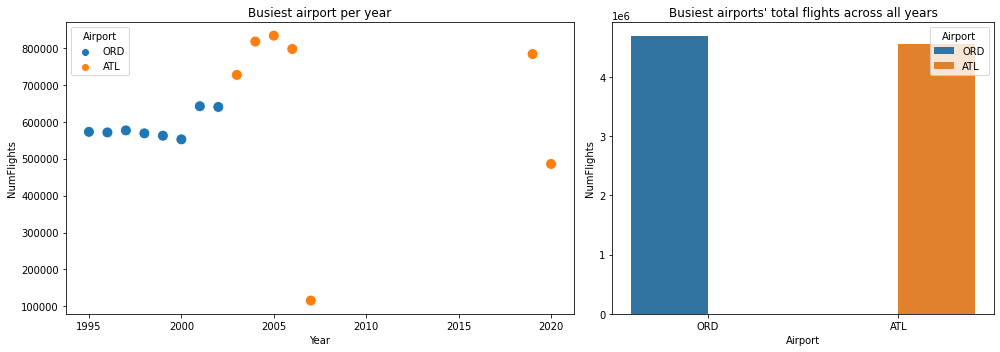

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=airports, x="Year", y="NumFlights", hue="Airport", ax=axs[0], s=120)
axs[0].set_title('Busiest airport per year')
sns.barplot(data=total_airp, x='Airport', y='NumFlights',hue='Airport', ax=axs[1])
axs[1].set_title('Busiest airports\' total flights across all years')

f.tight_layout()
